In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
from ipywidgets import interact
import numpy as np
import matplotlib as mpl
import arrow
%matplotlib inline

In [2]:
#############################################################################
# Prepare data and import into a dataframe
#############################################################################

# Export Data from healthkit using [qs-access](https://itunes.apple.com/us/app/qs-access/id920297614?mt=8) app 
exported_and_trandformed_csv_file = "data/weight.csv"
df = pd.read_csv(exported_and_trandformed_csv_file)

idx_weight = "Weight (lb)"
# make dateColumn a datetime.
idx_date="Start"
df[idx_date] = pd.to_datetime(df[idx_date])
df = df.set_index(df[idx_date])
df = df['2010/1/1':] # Throw away some junk data at the start of time
# Create Time Period Groups
idx_month_year="month_year" 
df[idx_month_year]=df[idx_date].apply(lambda t:f"{t.month}-{t.year-2000}")

idx_week_year="week_year" 
df[idx_week_year]=df[idx_date].apply(lambda t:f"{t.week}-{t.year-2000}")

# Helpful time aliases
df_alltime = df

In [3]:
def plot_weight_over_time(df, x):
    # In theory can use plot.ly (not free)  or Bokeh (not mpl compatible) but issues. So setting dimensions old school.
    # Manually setting the weight and width. 
    height_in_inches=8
    mpl.rc("figure", figsize=(2*height_in_inches,height_in_inches))
 
    ax = sns.boxplot(x=x, y=idx_weight, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    # ax.set_title("Weight")
    ax.set_xlabel("date")
    ax.set_ylabel("lbs")

# Recent Weight By Weeks

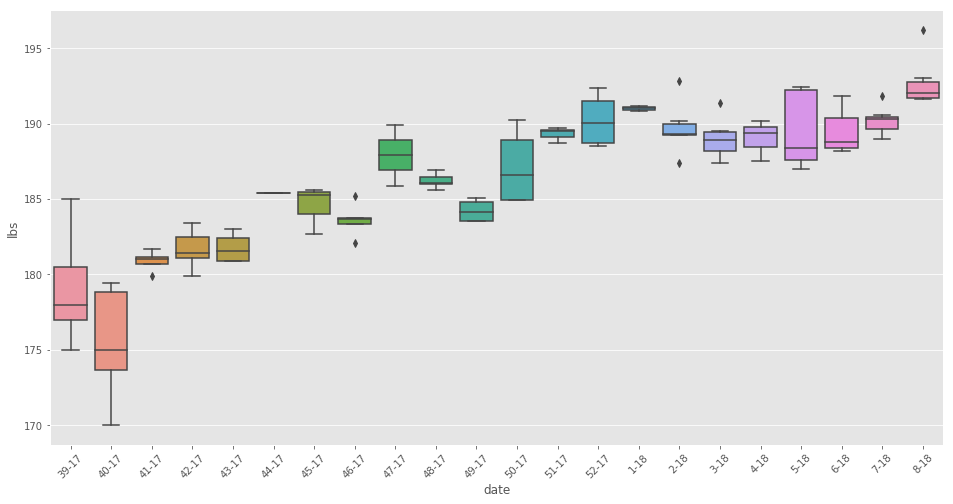

In [7]:
earliest = arrow.utcnow().shift(months=-5).date()
df_recent = df[df[idx_date] > earliest ]
plot_weight_over_time(df_recent,idx_week_year)

# Historical Weight By Month

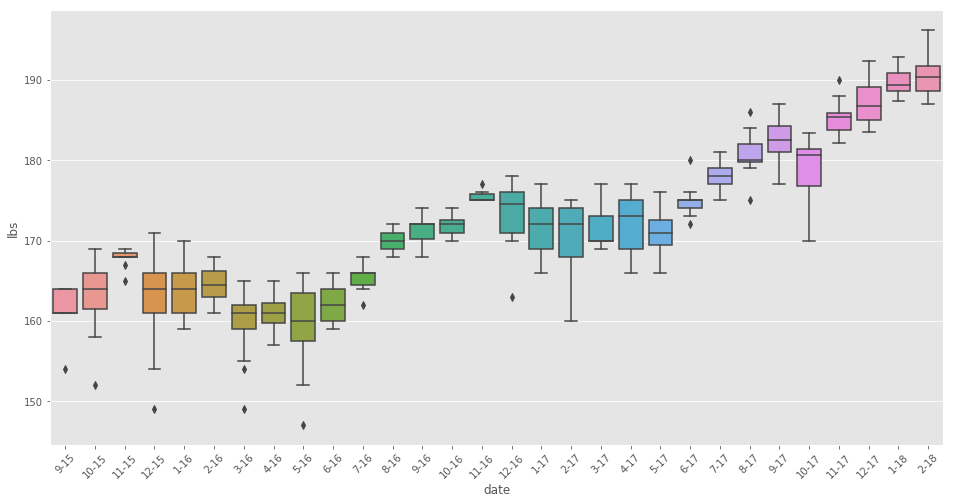

In [9]:
plot_weight_over_time(df_alltime,idx_month_year)

# Time Series Analysis Methodology using resampling

In [11]:
tempFrame = df.resample("W").apply([ len,np.min,np.median,np.max])
tempFrame.sort_index(ascending=False ).head(15)
# Can graph interactively using Bokeh @ 
# https://stackoverflow.com/questions/45972782/plot-time-series-graph-using-bokeh

Weight (lb)                                    
                   len        amin      median        amax
Start                                                     
2018-02-25         6.0  191.600000  192.000000  196.200000
2018-02-18         8.0  189.000000  190.300000  191.800000
2018-02-11         9.0  188.200000  188.800000  191.800000
2018-02-04         9.0  187.000000  188.400000  192.400000
2018-01-28         3.0  187.503154  189.377083  190.148701
2018-01-21         7.0  187.392923  188.936159  191.361244
2018-01-14         6.0  187.392923  189.321968  192.794248
2018-01-07         3.0  190.810088  191.030550  191.140781
2017-12-31         4.0  188.495234  190.038470  192.353324
2017-12-24         3.0  188.715696  189.487314  189.707777
2017-12-17         5.0  184.967838  186.621305  190.258932
2017-12-10         4.0  183.534833  184.141104  185.078069
2017-12-03         7.0  185.629225  186.070149  186.951998
2017-11-26         3.0  185.849687  187.944079  189.928239
2017-11-19         5.0  182.101829  183.645064  185.188300